<a href="https://colab.research.google.com/github/YejoongKwon/contests/blob/contestbranch/%EB%8F%99%EC%82%B0%EC%9D%84%EC%A7%80%ED%82%A4%EB%8A%94%EB%AA%BB%EC%83%9D%EA%B8%B4%EB%82%98%EB%AC%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지 설치 및 파일 불러오기

In [ ]:
install.packages("dplyr")
install.packages("ggplot2")
install.packages("tidyverse")
install.packages("stringi", dependencies=TRUE)
install.packages("reshape2",dependencies=TRUE)
install.packages("psych",dependencies=TRUE) 
install.packages("tidyr",dependencies=TRUE)
install.packages("ggthemes",dependencies=TRUE)
install.packages("stats",dependencies=TRUE)
install.packages('gsheet')  

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘rex’, ‘plyr’, ‘Rcpp’, ‘covr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependencies ‘graph’, ‘Rgraphviz’ are not available”
also installing the dependencies ‘pbivnorm’, ‘numDeriv’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘mnormt’, ‘psychTools’, ‘GPArotation’, ‘lavaan’, ‘lme4’, ‘Rcsdp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘repurrrsive’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is

In [ ]:
library(dplyr)
library(ggplot2)
library(tidyverse)
library(reshape2)
library(psych) 
library(tidyr)
library(ggthemes)
library(stats)
library(googlesheets4)
library(gsheet) 
theme_set(theme_fivethirtyeight())


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [ ]:
id<-"103hlKGyJcObt4cZYRm8dVGx5vEfe4wHZ"
cus_ifo<-read.csv(paste0("https://docs.google.com/uc?id=",id,"&exportdownload"))
id2<-"181_N7l8bD75zs6wEUk7MhRICGUeWOh1j"
cus_itg_sct_bnc<-read.csv(paste0("https://docs.google.com/uc?id=",id2,"&exportdownload"))
id3<-"1QJA6FDySkTIkirhWwuiZlE5kdcc0GBOa"
cus_tot_aet_ifo<-read.csv(paste0("https://docs.google.com/uc?id=",id3,"&exportdownload"))

# 데이터 준비

In [ ]:
bcd=left_join(cus_itg_sct_bnc,cus_ifo,by = c("act_no"="act_no", "bse_ym"="bse_ym"))
pick=cus_itg_sct_bnc[,c(1,2,3,12)]
pick_eachmonth=dcast(pick,act_no+iem_cd~bse_ym)

Using cns_bse_now_eal_amt as value column: use value.var to override.



In [ ]:
names(pick_eachmonth)=c('act_no','iem_cd','m202201','m202202','m202203','m202204','m202205','m202206')
pick_eachmonth_nona=pick_eachmonth %>% filter_at(vars('m202206','m202201'),all_vars(!is.na(.)))
pick_eachmonth_nona=pick_eachmonth_nona%>% mutate(increase_rate=(m202206-m202201)/m202201)

In [ ]:
pick_eachmonth_nona[c('increase_rate')][sapply(pick_eachmonth_nona[c('increase_rate')], is.infinite)] = NA
updown_ifo_1_increase_cat = pick_eachmonth_nona[!is.na(pick_eachmonth_nona$increase_rate),]
#increase_rate를 down(하락), stay(하락은 안했지만 1%이하상승), up(1월대비 6월에 1%이상 상승)으로 나누기
pick_eachmonth_updown=updown_ifo_1_increase_cat %>% mutate(updown= ifelse(increase_rate< 0, "down", 
                                                                ifelse(increase_rate<=0.01, "stay",
                                                                "up"))) %>%arrange(updown)
#cus_ifo와 pick_eachmonth_updown 연결
ifo_only1=cus_ifo %>% filter(bse_ym =="202201") 
updown_ifo=merge(pick_eachmonth_updown,ifo_only1, by.all="act_no", all.x=T)


In [ ]:
updown_ifo_1=updown_ifo %>% filter(updown=="up")
updown_ifo_down=updown_ifo %>% filter(updown=="down")
nrow(updown_ifo_1)
nrow(updown_ifo_down)

**1월~6월 간 체결기준 평가금액 오른 종목-고객 분석**
: up그룹(11248명)

**1월~6월 간 체결기준 평가금액 하락한 종목-고객 분석**
: down그룹(28171명)



# 1.연령대(cus_age_stn_cd) 성별(sex_dit_cd) 수익률

[1] 10826

`summarise()` has grouped output by 'cus_age_stn_cd'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'cus_age_stn_cd'. You can override using
the `.groups` argument.


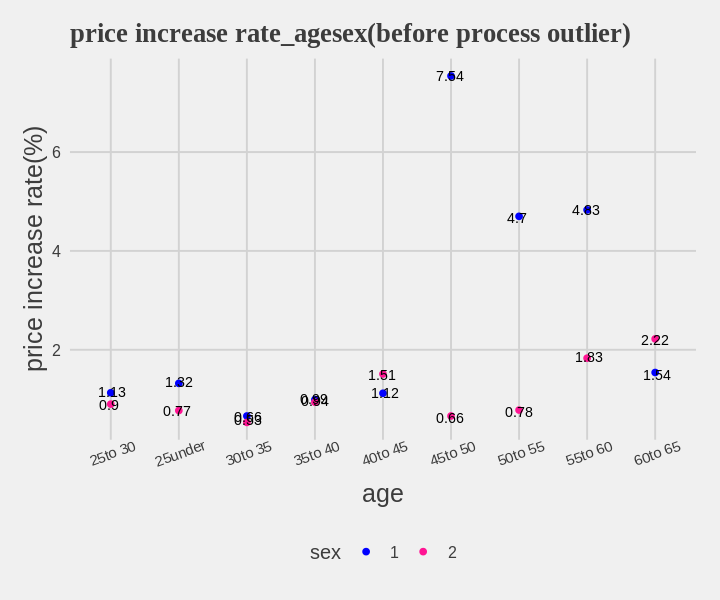

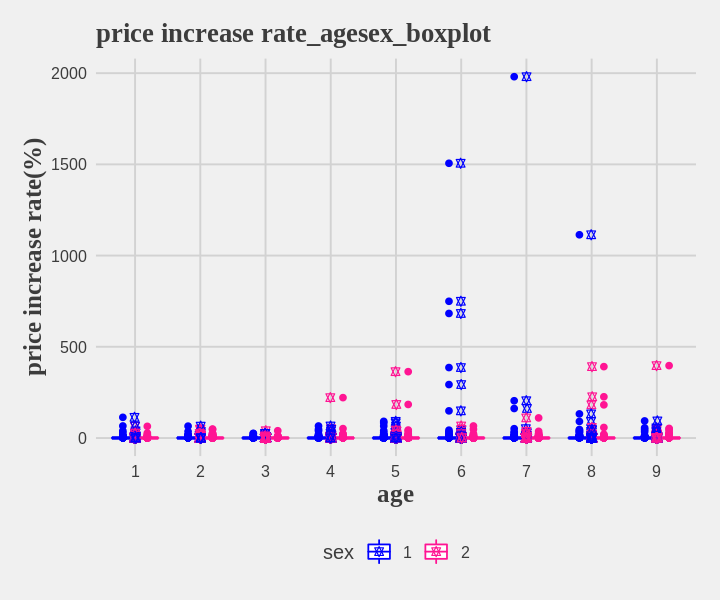

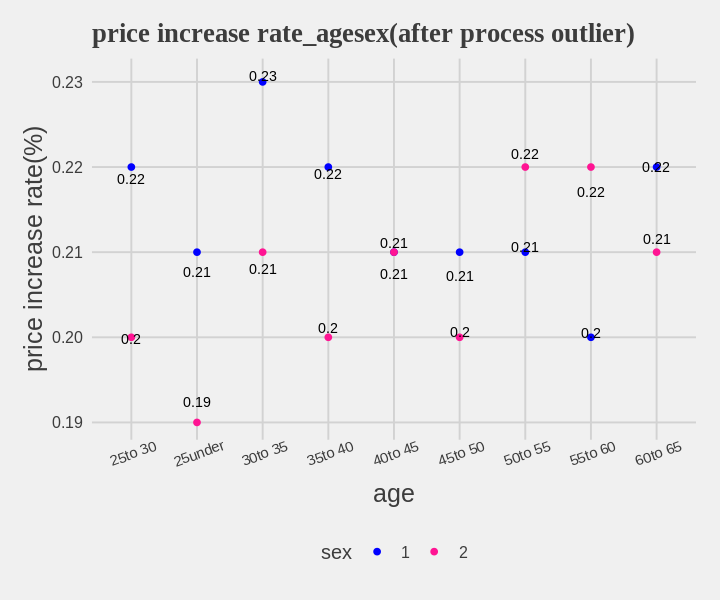

In [ ]:
#데이터 준비
#updown_ifo_1의 성별 99값과 나이 99값 drop
updown_ifo_1_no99=updown_ifo_1[!(updown_ifo_1$sex_dit_cd == 99 ), ]
updown_ifo_1_no99=updown_ifo_1_no99[!(updown_ifo_1_no99$cus_age_stn_cd == 99 ), ]
nrow(updown_ifo_1_no99)#10826
#categorization
agesex=updown_ifo_1_no99 %>% group_by(cus_age_stn_cd,sex_dit_cd) %>% summarise(mean=mean(increase_rate))
x_axis_labels = min(agesex[,"cus_age_stn_cd"]):max(agesex[,"cus_age_stn_cd"])
agesex$cus_age_stn_cd=as.character(agesex$cus_age_stn_cd)
agesex$sex_dit_cd=as.factor(agesex$sex_dit_cd)
agesex = agesex %>% mutate(cus_age_stn_cd= ifelse(cus_age_stn_cd == '1',"25under",
                                  ifelse(cus_age_stn_cd == '2',"25to 30",
                                         ifelse(cus_age_stn_cd == '3',"30to 35",
                                         ifelse(cus_age_stn_cd == '4',"35to 40",
                                          ifelse(cus_age_stn_cd == '5',"40to 45",
                                           ifelse(cus_age_stn_cd == '6',"45to 50",
                                           ifelse(cus_age_stn_cd == '7',"50to 55" ,
                                            ifelse(cus_age_stn_cd == '8',"55to 60",
                                             ifelse(cus_age_stn_cd == '9',"60to 65")))))))))) %>%arrange(cus_age_stn_cd)
agesex=agesex %>%   mutate(mean = round(mean, digits = 2))
#모든연령대 outlier 제거 작업
updown_ifo_1_no99rmin=quantile(updown_ifo_1_no99$increase_rate,.1)-1.5*IQR(updown_ifo_1_no99$increase_rate)
updown_ifo_1_no99rmax=quantile(updown_ifo_1_no99$increase_rate,.3)+1.5*IQR(updown_ifo_1_no99$increase_rate)
updown_ifo_1_no99_nooutlier=subset(updown_ifo_1_no99,increase_rate>updown_ifo_1_no99rmin &increase_rate<updown_ifo_1_no99rmax)
agesex_nooutlier=updown_ifo_1_no99_nooutlier %>% group_by(cus_age_stn_cd,sex_dit_cd) %>% summarise(mean=mean(increase_rate))
x_axis_labels = min(agesex_nooutlier[,"cus_age_stn_cd"]):max(agesex_nooutlier[,"cus_age_stn_cd"])
agesex_nooutlier$cus_age_stn_cd=as.character(agesex_nooutlier$cus_age_stn_cd)
agesex_nooutlier$sex_dit_cd=as.factor(agesex_nooutlier$sex_dit_cd)
agesex_nooutlier = agesex_nooutlier %>% mutate(cus_age_stn_cd= ifelse(cus_age_stn_cd == '1',"25under",
                                  ifelse(cus_age_stn_cd == '2',"25to 30",
                                         ifelse(cus_age_stn_cd == '3',"30to 35",
                                         ifelse(cus_age_stn_cd == '4',"35to 40",
                                          ifelse(cus_age_stn_cd == '5',"40to 45",
                                           ifelse(cus_age_stn_cd == '6',"45to 50",
                                           ifelse(cus_age_stn_cd == '7',"50to 55" ,
                                            ifelse(cus_age_stn_cd == '8',"55to 60",
                                             ifelse(cus_age_stn_cd == '9',"60to 65")))))))))) %>%arrange(cus_age_stn_cd)
agesex_nooutlier=agesex_nooutlier %>%   mutate(mean = round(mean, digits = 2))

##그래프 그리기
#연령대별 평가금액 증가율에 outlier 있는지 boxplot
allage_boxplot=ggplot(updown_ifo_1_no99, aes(x=as.factor(cus_age_stn_cd), y=increase_rate,color=as.factor(sex_dit_cd))) +  geom_boxplot()+geom_jitter(shape=11, position=position_jitter(0.01))+  ggtitle('price increase rate_agesex_boxplot')+xlab('age')+ ylab('price increase rate(%)')+
  scale_color_manual(values = c("blue1", "deeppink"),name="sex")+ theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15,face="bold",family="serif"))
#outlier 제거전
agesex_graph=ggplot(agesex, aes(x = cus_age_stn_cd, y = mean)) + 
  geom_point(aes(color = sex_dit_cd)) + geom_text(aes(label=mean),size=3,position=position_jitter(width=0.03,height=0.05))+
  scale_color_manual(values = c("blue1", "deeppink"),name="sex")+ggtitle('price increase rate_agesex(before process outlier)')+xlab('age')+ ylab('price increase rate(%)')+ theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15), axis.text.x = element_text(size=9,angle=20)) 
#outlier제거후
options(repr.plot.width=10, repr.plot.height=8)
agesex_nooutlier_graph=ggplot(agesex_nooutlier, aes(x = cus_age_stn_cd, y = mean)) + 
  geom_point(aes(color = sex_dit_cd)) + geom_text(aes(label=mean),size=3,position=position_jitter(width=0.003,height=0.003))+
  scale_color_manual(values = c("blue1", "deeppink"),name="sex")+ggtitle('price increase rate_agesex(after process outlier)')+xlab('age')+ ylab('price increase rate(%)')+ theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15), axis.text.x = element_text(size=9,angle=20)) 

##3개 그래프 모음
par(mfcol=c(1,3))
options(repr.plot.width=6, repr.plot.height=5)
agesex_graph
allage_boxplot
agesex_nooutlier_graph



*   평균적으로 30세이상 35세미만 남성이 1월~6월간 결제기준평가금액의 높은 상승을 경험, 이후 연령대 높아질수록 수익률의 평균 줄어듬
 
  -이는 생애소득이 높을때 투자량을 늘려 많은 수익을 올리기 때문일 것으로 추정
*   여성의 경우, 이와 같은 경향이 나타나지 않고 나이대별로 들쭉날쭉한 평균수익률을 보임
*   대체로 여성보다 남성의 수익률이 우세하나 50세이상~60세미만 그룹에서 남성보다 여성의 수익률이 좋았음
*   이상치 제거 전 타 연령대보다 높은 수익률을 보였던 45세 이상 60세 미만 남성 그룹은 이상치 제거했을 때, 다른 연령대와 비슷해짐(두드러지지 않게 됨)
  
  -이는 45세 이상 60세 미만 남성 그룹에서 소수의 고수(제거된 이상치)가 해당 그룹의 평균 수익률을 높게 만들고 있음을 의미 


# 2. 총투자기간별 수익 및 손실


**2-1. 총투자기간별 수익률(up)**

[1] 11248

[1] 9226

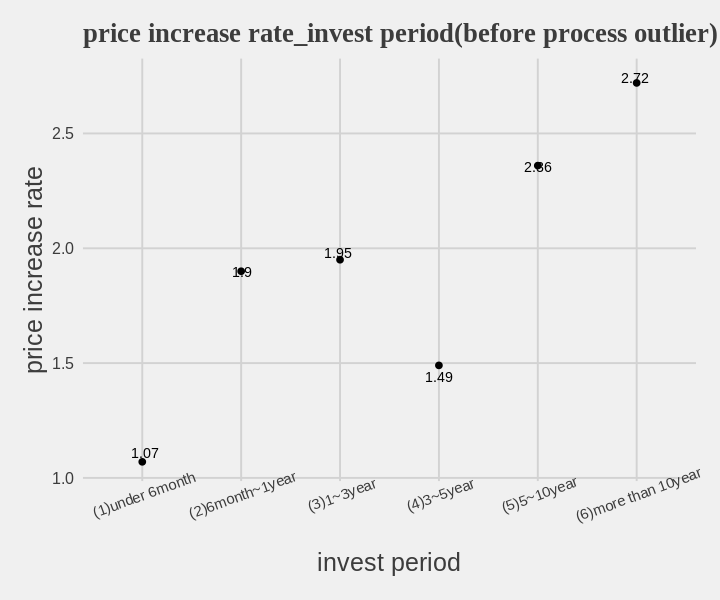

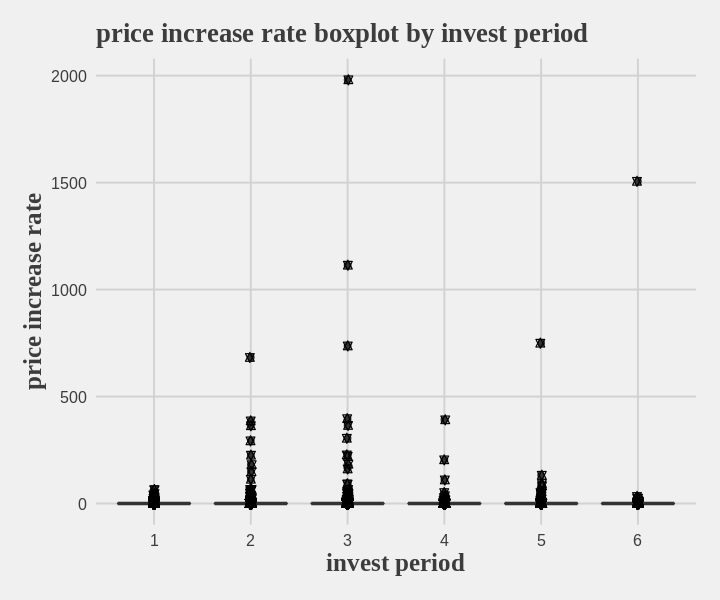

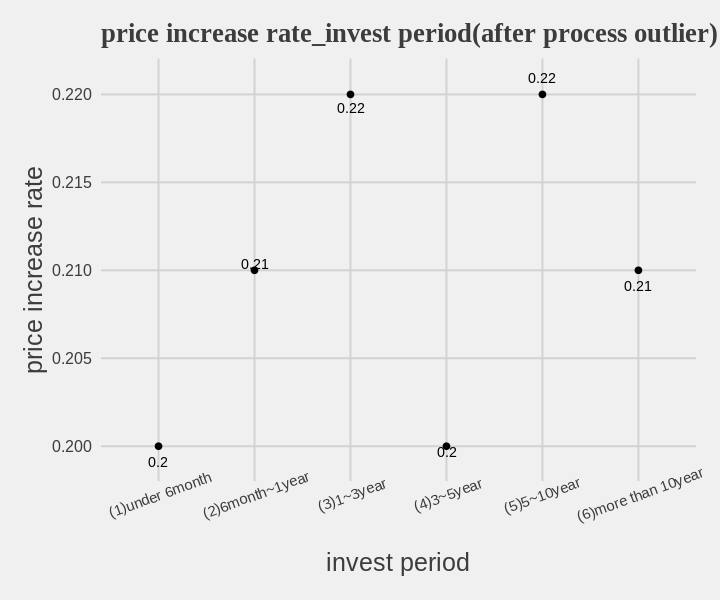

In [ ]:
#데이터준비
#updown_ifo_1의 tot_ivs_te_sgm_cd 99값 drop
updown_ifo_2_no99=updown_ifo_1[!(updown_ifo_1$tot_ivs_te_sgm_cd == 99 ), ]

period_invest=updown_ifo_2_no99 %>% group_by(tot_ivs_te_sgm_cd) %>% summarise(mean=mean(increase_rate))
x_axis_labels2 = min(period_invest[,"tot_ivs_te_sgm_cd"]):max(period_invest[,"tot_ivs_te_sgm_cd"])
period_invest$tot_ivs_te_sgm_cd=as.character(period_invest$tot_ivs_te_sgm_cd)
period_invest = period_invest[!is.na(period_invest$tot_ivs_te_sgm_cd),]
#sum(is.na(period_invest$tot_ivs_te_sgm_cd))
period_invest2= period_invest %>% mutate(tot_ivs_te_sgm_cd= ifelse(tot_ivs_te_sgm_cd == '1',"(1)under 6month",
                                  ifelse(tot_ivs_te_sgm_cd == '2',"(2)6month~1year",
                                         ifelse(tot_ivs_te_sgm_cd == '3',"(3)1~3year",
                                         ifelse(tot_ivs_te_sgm_cd == '4',"(4)3~5year",
                                          ifelse(tot_ivs_te_sgm_cd == '5',"(5)5~10year","(6)more than 10year")))))) %>%arrange(tot_ivs_te_sgm_cd)
period_invest2=period_invest2 %>%   mutate(mean = round(mean, digits = 2))

#outlier 제거전 plot
period_invest_graph=ggplot(period_invest2, aes(x = tot_ivs_te_sgm_cd, y = mean)) + 
  geom_point() + geom_text(aes(label=mean),size=3,position=position_jitter(width=0.03,height=0.05))+
 ggtitle('price increase rate_invest period(before process outlier)')+xlab('invest period')+ ylab('price increase rate')+ theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15), axis.text.x = element_text(size=9,angle=20)) 

#outlier제거후
#invest period별 price increase rate에 outlier 있는지 boxplot 그려서 확인
period_invest_boxplot=ggplot(updown_ifo_2_no99, aes(x=as.factor(tot_ivs_te_sgm_cd), y=increase_rate)) +  geom_boxplot() +geom_jitter(shape=11, position=position_jitter(0.01))+  ggtitle('price increase rate boxplot by invest period')+xlab('invest period')+ ylab('price increase rate')+
theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15,face="bold",family="serif"))
####ggsave("period_invest_boxplot.png",period_invest_boxplot, dpi=700)
#1~3year 투자자의 outlier 수가 많음.

#모든연령대 outlier 제거
updown_ifo_2_no99rmin=quantile(updown_ifo_2_no99$increase_rate,.1)-1.5*IQR(updown_ifo_2_no99$increase_rate)
updown_ifo_2_no99rmax=quantile(updown_ifo_2_no99$increase_rate,.3)+1.5*IQR(updown_ifo_2_no99$increase_rate)
updown_ifo_2_no99_nooutlier=subset(updown_ifo_2_no99,increase_rate>updown_ifo_2_no99rmin & increase_rate<updown_ifo_2_no99rmax)
nrow(updown_ifo_2_no99)#11248
nrow(updown_ifo_2_no99_nooutlier)#9226

period_invest_nooutlier=updown_ifo_2_no99_nooutlier %>% group_by(tot_ivs_te_sgm_cd) %>% summarise(mean=mean(increase_rate))
#period_x_axis_labels_nooutlier = min(period_invest_nooutlier[,"tot_ivs_te_sgm_cd"]):max(agesex_nooutlier[,"tot_ivs_te_sgm_cd"])
period_invest_nooutlier$tot_ivs_te_sgm_cd=as.character(period_invest_nooutlier$tot_ivs_te_sgm_cd)
period_invest_nooutlier$tot_ivs_te_sgm_cd=as.factor(period_invest_nooutlier$tot_ivs_te_sgm_cd)
period_invest_nooutlier = period_invest_nooutlier %>% 
                            mutate(tot_ivs_te_sgm_cd= ifelse(tot_ivs_te_sgm_cd == '1',"(1)under 6month",
                                  ifelse(tot_ivs_te_sgm_cd == '2',"(2)6month~1year",
                                         ifelse(tot_ivs_te_sgm_cd == '3',"(3)1~3year",
                                         ifelse(tot_ivs_te_sgm_cd == '4',"(4)3~5year",
                                          ifelse(tot_ivs_te_sgm_cd == '5',"(5)5~10year ","(6)more than 10year"))))))%>%arrange(tot_ivs_te_sgm_cd)

period_invest_nooutlier=period_invest_nooutlier %>%   mutate(mean = round(mean, digits = 2))

#outlier 제거후 plot
period_invest_graph2=ggplot(period_invest_nooutlier, aes(x = tot_ivs_te_sgm_cd, y = mean)) + 
  geom_point() + geom_text(aes(label=mean),size=3,position=position_jitter(width=0.001,height=0.001))+
 ggtitle('price increase rate_invest period(after process outlier)')+xlab('invest period')+ ylab('price increase rate')+ theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15), axis.text.x = element_text(size=9,angle=20)) 


#invest period별 플롯 종합
par(mfrow=c(1,3))
period_invest_graph
period_invest_boxplot
period_invest_graph2


*  이상치 제거 후 10년 이상 투자한 사람들의 평균수익률이 낮아졌음. 

  -즉, more than 10 year 투자자 중 소수의 고수가 해당그룹의 평균 수익률을 높임

*   투자기간이 6개월 미만인 투자자들의 종목 평균수익이 확연히 안 좋음.



**2-2. 총투자기간별 손실률(down)**

[1] 28171

[1] 26409

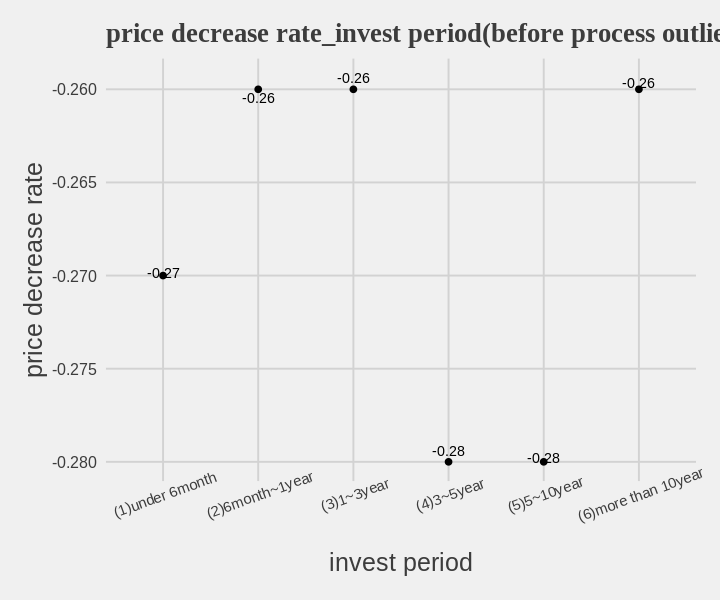

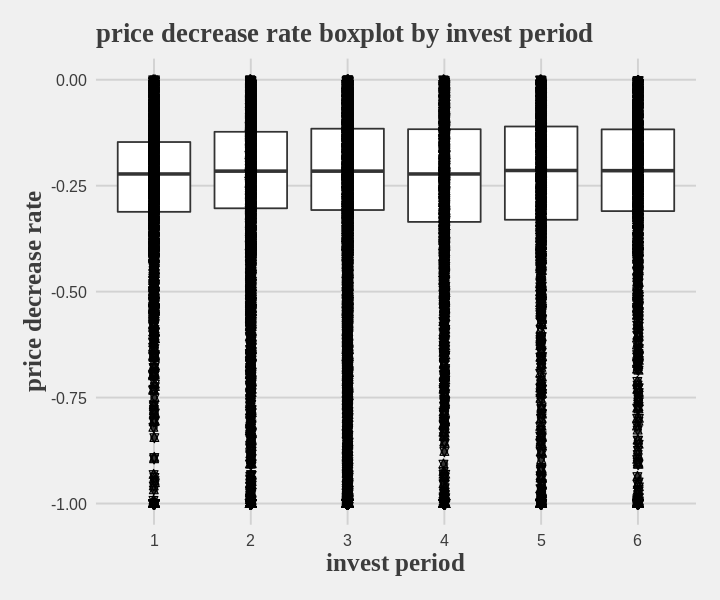

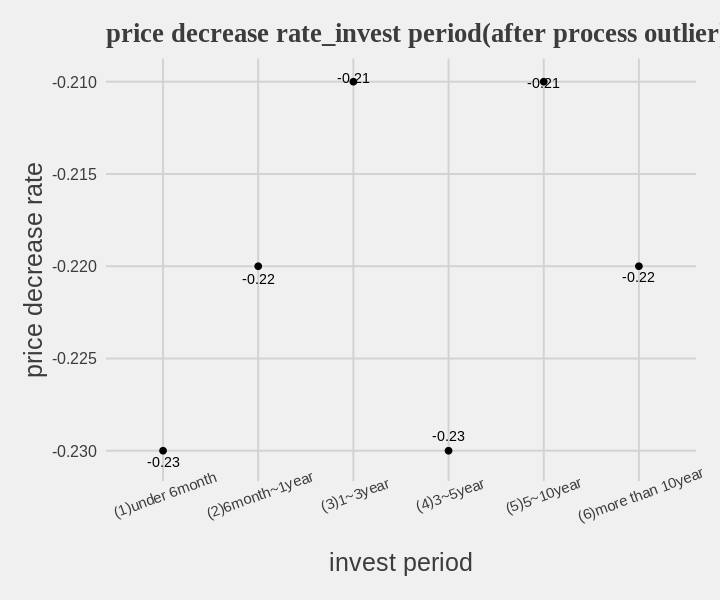

In [ ]:
#increase rate가 down한 사람들만 골라내서 invest period별 플롯 만들기
#2)invest periodtot_ivs_te_sgm_cd
#updown_ifo_down의 tot_ivs_te_sgm_cd 99값 drop
updown_ifo_down_no99=updown_ifo_down[!(updown_ifo_down$tot_ivs_te_sgm_cd == 99 ), ]

period_inivest_down=updown_ifo_down_no99 %>% group_by(tot_ivs_te_sgm_cd) %>% summarise(mean=mean(increase_rate))
period_inivest_down$tot_ivs_te_sgm_cd=as.character(period_inivest_down$tot_ivs_te_sgm_cd)
period_inivest_down = period_inivest_down[!is.na(period_inivest_down$tot_ivs_te_sgm_cd),]
#sum(is.na(period_inivest_down$tot_ivs_te_sgm_cd))
period_inivest_down2= period_inivest_down %>% mutate(tot_ivs_te_sgm_cd= ifelse(tot_ivs_te_sgm_cd == '1',"(1)under 6month",
                                  ifelse(tot_ivs_te_sgm_cd == '2',"(2)6month~1year",
                                         ifelse(tot_ivs_te_sgm_cd == '3',"(3)1~3year",
                                         ifelse(tot_ivs_te_sgm_cd == '4',"(4)3~5year",
                                          ifelse(tot_ivs_te_sgm_cd == '5',"(5)5~10year","(6)more than 10year")))))) %>%arrange(tot_ivs_te_sgm_cd)
period_inivest_down2=period_inivest_down2 %>%   mutate(mean = round(mean, digits = 2))

#outlier 제거전 plot
period_inivest_down_graph=ggplot(period_inivest_down2, aes(x = tot_ivs_te_sgm_cd, y = mean)) + 
  geom_point() + geom_text(aes(label=mean),size=3,position=position_jitter(width=0.001,height=0.001))+
 ggtitle('price decrease rate_invest period(before process outlier)')+xlab('invest period')+ ylab('price decrease rate')+ theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15), axis.text.x = element_text(size=9,angle=20)) 

#outlier제거후
#invest period별 평가금액 감소율에 outlier 있는지 boxplot 그려서 확인
period_inivest_down_boxplot=ggplot(updown_ifo_down_no99, aes(x=as.factor(tot_ivs_te_sgm_cd), y=increase_rate)) +  geom_boxplot() +geom_jitter(shape=11, position=position_jitter(0.01))+  ggtitle('price decrease rate boxplot by invest period')+xlab('invest period')+ ylab('price decrease rate')+
theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15,face="bold",family="serif"))
####ggsave("period_inivest_down_boxplot.png",period_inivest_down_boxplot, dpi=700)
#1~3year 투자자의 outlier 수가 많음.

#outlier 제거
updown_ifo_down_no99rmin=quantile(updown_ifo_down_no99$increase_rate,.1)-1.5*IQR(updown_ifo_down_no99$increase_rate)
updown_ifo_down_no99rmax=quantile(updown_ifo_down_no99$increase_rate,.3)+1.5*IQR(updown_ifo_down_no99$increase_rate)
updown_ifo_down_no99_nooutlier=subset(updown_ifo_down_no99,increase_rate>updown_ifo_down_no99rmin & increase_rate<updown_ifo_down_no99rmax)
nrow(updown_ifo_down_no99)#11248
nrow(updown_ifo_down_no99_nooutlier)#9226

period_inivest_down_nooutlier=updown_ifo_down_no99_nooutlier %>% group_by(tot_ivs_te_sgm_cd) %>% summarise(mean=mean(increase_rate))
period_inivest_down_nooutlier$tot_ivs_te_sgm_cd=as.character(period_inivest_down_nooutlier$tot_ivs_te_sgm_cd)
period_inivest_down_nooutlier$tot_ivs_te_sgm_cd=as.factor(period_inivest_down_nooutlier$tot_ivs_te_sgm_cd)
period_inivest_down_nooutlier = period_inivest_down_nooutlier %>% 
                            mutate(tot_ivs_te_sgm_cd= ifelse(tot_ivs_te_sgm_cd == '1',"(1)under 6month",
                                  ifelse(tot_ivs_te_sgm_cd == '2',"(2)6month~1year",
                                         ifelse(tot_ivs_te_sgm_cd == '3',"(3)1~3year",
                                         ifelse(tot_ivs_te_sgm_cd == '4',"(4)3~5year",
                                          ifelse(tot_ivs_te_sgm_cd == '5',"(5)5~10year ","(6)more than 10year"))))))%>%arrange(tot_ivs_te_sgm_cd)

period_inivest_down_nooutlier=period_inivest_down_nooutlier %>%   mutate(mean = round(mean, digits = 2))

period_inivest_down_graph2=ggplot(period_inivest_down_nooutlier, aes(x = tot_ivs_te_sgm_cd, y = mean)) + 
  geom_point() + geom_text(aes(label=mean),size=3,position=position_jitter(width=0.001,height=0.001))+
 ggtitle('price decrease rate_invest period(after process outlier)')+xlab('invest period')+ ylab('price decrease rate')+ theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15), axis.text.x = element_text(size=9,angle=20)) 


#invest period별 수익률 down 플롯 종합
par(mfrow=c(1,3))
period_inivest_down_graph
period_inivest_down_boxplot
period_inivest_down_graph2





*   이상치 제거후 평가금액 감소율 가장 높은 그룹은 6개월 미만 투자자임.
*   5년~10년 미만 투자자들의 감소율이 이상치 제거 전후의 차이가 가장 큼(이상치 제거 후 제거 전보다 평가금액 감소율이 줄어듦)
    
    -이는 5년~10년미만 투자자들 중 6개월 기간 동안 평가금액 크게 손실 시키는 종목 투자자들이 있었다는 뜻.



**2-3. 수익률 등구간(ir_samerange)별 총투자기간 구성비**

`summarise()` has grouped output by 'ir_samerange'. You can override using the
`.groups` argument.


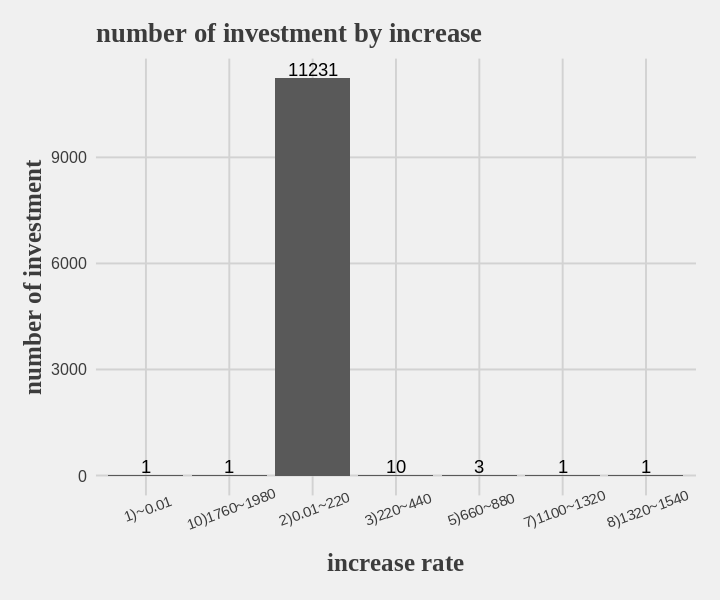

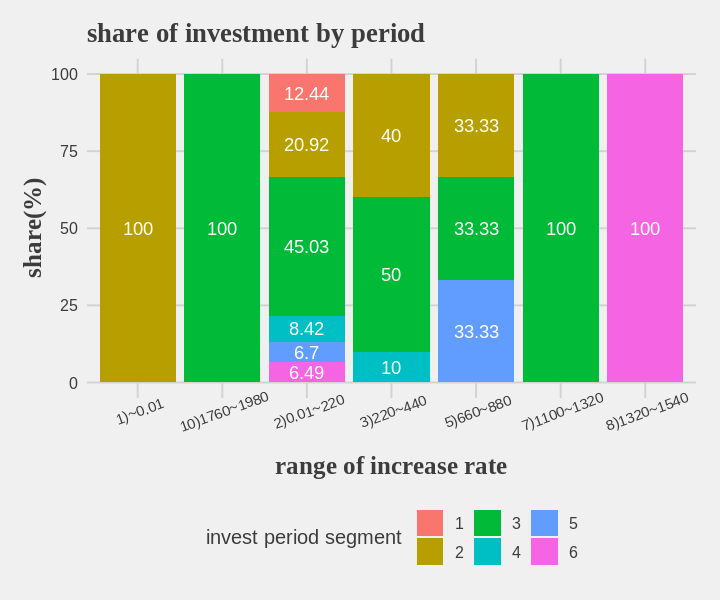

In [ ]:
#up인 사람들의 increase_rate를 등구간으로 나누어서 범주형변수(ir_samerange)추가
rangedata <- data.frame(NA_col = rep(NA, 1))     # Creating data containing NA
for(i in 1:10) {                             # Head of for-loop
  new_col <- min(updown_ifo_1$increase_rate)+({max(updown_ifo_1$increase_rate)-min(updown_ifo_1$increase_rate)}/9)*(i-1)                     # Creating new variable
  rangedata[,i] <- new_col                     # Adding new variable to data
  colnames(rangedata)[i] <- paste0("up_", i)    # Renaming new variable
}
#rangedata[1,2]
updown_ifo_1_increase_samerange = updown_ifo_1 %>% mutate(ir_samerange= ifelse(increase_rate<=rangedata[1,1],"1)~0.01", 
                                                                ifelse(increase_rate<=rangedata[1,2],"2)0.01~220",
                                                                ifelse(increase_rate<=rangedata[1,3],"3)220~440",
                                                                ifelse(increase_rate<=rangedata[1,4],"4)440~660",
                                                                ifelse(increase_rate<=rangedata[1,5],"5)660~880",
                                                                ifelse(increase_rate<=rangedata[1,6],"6)880~1100",
                                                                ifelse(increase_rate<=rangedata[1,7],"7)1100~1320",
                                                                ifelse(increase_rate<=rangedata[1,8],"8)1320~1540",
                                                                ifelse(increase_rate<=rangedata[1,9], "9)1540~1760","10)1760~1980"))))))))))%>% arrange(ir_samerange)


#cus_ifo와 updown_ifo_1_increase_samerange연결 ifo_pick_samerange
ifo_pick_samerange=merge(updown_ifo_1_increase_samerange,ifo_only1, by.all="act_no", all.x=T)

tendency_ifo_pick_samerange=ifo_pick_samerange %>%  group_by(ir_samerange,tot_ivs_te_sgm_cd) %>% summarise(iem_cd=n())
tendency_ifo_pick_samerange1=tendency_ifo_pick_samerange %>%  mutate(rate=(iem_cd/sum(iem_cd)*100)) %>%  mutate(rate= round(rate, digits = 2))
tendency_ifo_pick_samerange2=tendency_ifo_pick_samerange1 %>% group_by(ir_samerange) %>% summarise(subsum_iem_cd=sum(iem_cd))

bypeople<-ggplot(tendency_ifo_pick_samerange2, aes(x=ir_samerange, y = subsum_iem_cd))   +  geom_bar(stat = "identity") +  geom_text(aes(label = subsum_iem_cd), vjust = -0.2)+
  ggtitle("number of investment by increase")+xlab('increase rate')+ ylab('number of investment')+ theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15,face="bold",family="serif"),axis.text.x = element_text(size=9,angle=20)) 

investorspread_increase1=ggplot(tendency_ifo_pick_samerange1, aes(x=ir_samerange, y = rate,fill = factor(tot_ivs_te_sgm_cd))) +  geom_bar(stat = "identity")+  geom_text(aes(label =rate), color = "white", position = position_stack(vjust = 0.5)) +  ggtitle('share of investment by period')+xlab('range of increase rate')+ ylab('share(%)')+scale_fill_discrete(name = "invest period segment")+ theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15,face="bold",family="serif"),axis.text.x = element_text(size=9,angle=20))
#수익률 구간이 1%~22000% 사이에 대부분의 사람들이 분포함. 
par(mfrow=c(1,2))
bypeople
investorspread_increase1



*   수익률을 등구간으로 나누었을 때, 대부분의 투자자가 1%~22000% 구간에 분포함
*   이들 중 45%가량이 1년~3년 미만 투자한 사람.
*   엄청난 고수익자 한 명이 10년 이상 투자한 사람임








**2-4. 수익률 quantile별 총투자기간 구성비**

10%          20%          30%          40%          50%          60% 
4.761905e-02 9.289853e-02 1.224226e-01 1.626079e-01 2.000000e-01 2.545455e-01 
         70%          80%          90%         100% 
4.062994e-01 6.676737e-01 1.469446e+00 1.980528e+03

`summarise()` has grouped output by 'increase_cat'. You can override using the
`.groups` argument.


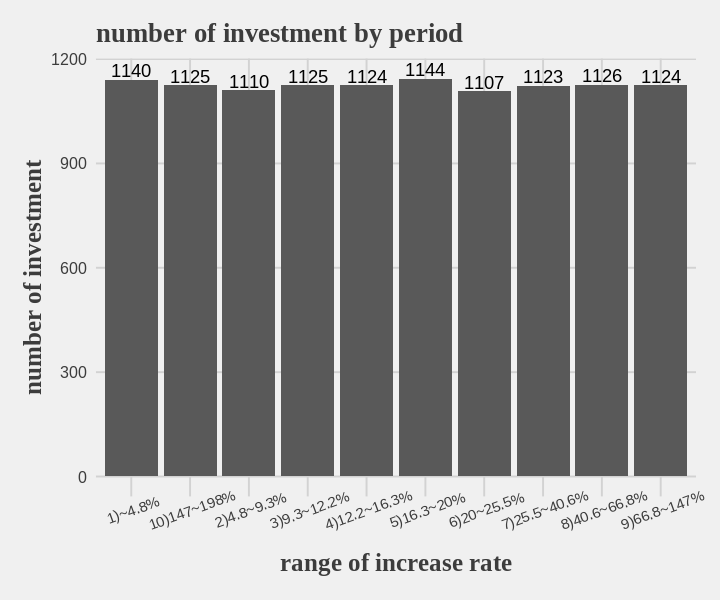

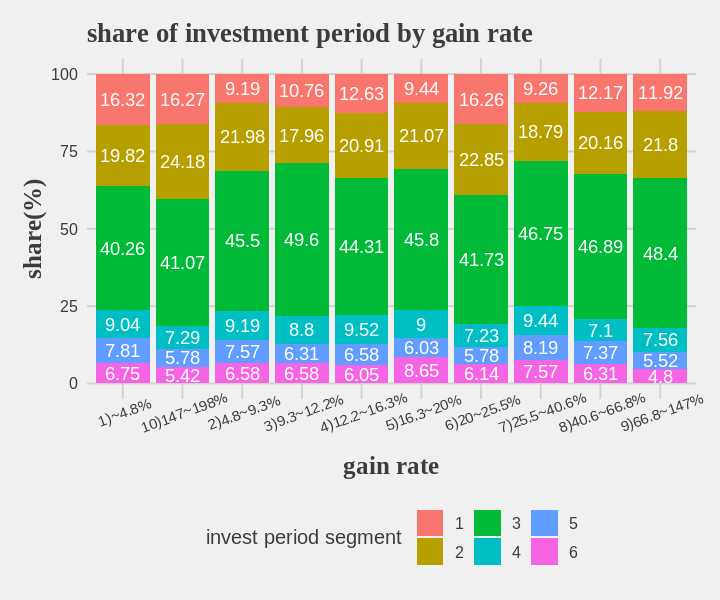

In [ ]:
#updown이 up인 사람들의 increase_rate 의 구간별 percentile범주형 변수(increase_cat) 추가
quantile(updown_ifo_1$increase_rate, c(.1, .2, .3,.4,.5,.6,.7,.8,.9,1)) 
updown_ifo_1_increase_cat=updown_ifo_1 %>% mutate(increase_cat= ifelse(increase_rate<=quantile(updown_ifo_1$increase_rate, .1), "1)~4.8%", 
                                                                ifelse(increase_rate<=quantile(updown_ifo_1$increase_rate, .2), "2)4.8~9.3%",
                                                                ifelse(increase_rate<=quantile(updown_ifo_1$increase_rate, .3), "3)9.3~12.2%",
                                                                ifelse(increase_rate<=quantile(updown_ifo_1$increase_rate, .4), "4)12.2~16.3%",
                                                                ifelse(increase_rate<=quantile(updown_ifo_1$increase_rate, .5), "5)16.3~20%",
                                                                ifelse(increase_rate<=quantile(updown_ifo_1$increase_rate, .6), "6)20~25.5%",
                                                                ifelse(increase_rate<=quantile(updown_ifo_1$increase_rate, .7), "7)25.5~40.6%",
                                                                ifelse(increase_rate<=quantile(updown_ifo_1$increase_rate, .8), "8)40.6~66.8%",
                                                                ifelse(increase_rate<=quantile(updown_ifo_1$increase_rate, .9), "9)66.8~147%","10)147~198%"))))))))))%>% arrange(increase_cat)
ifo_pick=merge(updown_ifo_1_increase_cat,ifo_only1, by.all="act_no", all.x=T)
#tot_ivs_te_sgm_cd값의 increase_cat   별 추이 분석
tendency_ifo_pick=ifo_pick %>%  group_by(increase_cat,tot_ivs_te_sgm_cd) %>% summarise(iem_cd=n())
tendency_ifo_pick1=tendency_ifo_pick %>%  mutate(rate=(iem_cd/sum(iem_cd)*100)) %>%  mutate(rate= round(rate, digits = 2))
tendency_ifo_pick2=tendency_ifo_pick1 %>% group_by(increase_cat) %>% summarise(subsum_iem_cd=sum(iem_cd))


investorspread_increase_num<-ggplot(tendency_ifo_pick2, aes(x=increase_cat, y = subsum_iem_cd))   +  geom_bar(stat = "identity") +  geom_text(aes(label = subsum_iem_cd), vjust = -0.2)+
ggtitle("number of investment by period")+xlab('range of increase rate')+ ylab('number of investment')+ theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15,face="bold",family="serif"),axis.text.x = element_text(size=9,angle=20)) 

investorspread_increase_share=ggplot(tendency_ifo_pick1, aes(x=increase_cat, y = rate,fill = factor(tot_ivs_te_sgm_cd))) +  geom_bar(stat = "identity")+  geom_text(aes(label =rate), color = "white", position = position_stack(vjust = 0.5)) +  ggtitle('share of investment period by gain rate')+xlab('gain rate')+ ylab('share(%)')+scale_fill_discrete(name = "invest period segment")+ theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15,face="bold",family="serif"),axis.text.x = element_text(size=9,angle=20))
##ggsave("period_investorspread_increase.png",investorspread_increase, dpi=700)
#increase_rate updown이 up 인 사람들의 수익률 구간은(quantile로 나누었을때) 비슷하게 분포함. 
par(mfrow=c(1,2))
investorspread_increase_num
investorspread_increase_share



*   수익이 생긴 사람들을 quantile별로 분포했기 때문에 투자건수는 구간별로 비슷하게 나타남(주식 종목은 수익률 높낮이에 관계없이 일정한 총투자기간 구성비를 지니고 있음)
*   수익률quantile이 높을수록 총투자기간이 긴 사람들이 많을 것이라 가설을 세웠으나, 의외로 총투자기간 구성비가 종목의 수익률과 관계없이 일정한 것으로 나타남
*   즉 총투자기간이 길다고 수익률을 많이 내는 종목에 집중투자하지 않으며, 총투자기간이 짧다고 수익률을 적게 내는 종목에만 투자하지 않다는 것을 의미





**2-5.손실률 quantile별 총투자기간 구성비**

`summarise()` has grouped output by 'increase_cat'. You can override using the
`.groups` argument.


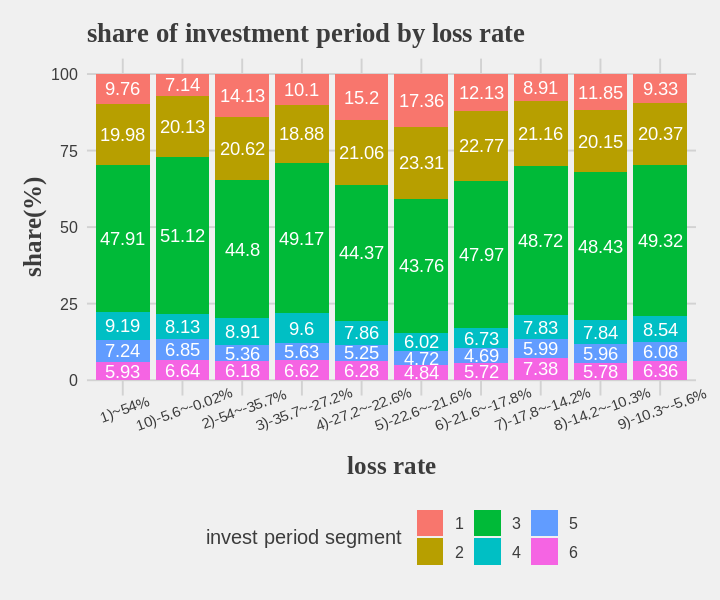

In [ ]:
#updown이 down인 사람들 손실률별 invest period 분석
updown_ifo_down_increase_cat=updown_ifo_down %>% mutate(increase_cat= ifelse(increase_rate<=quantile(updown_ifo_down$increase_rate, .1), "1)~54%", 
                                                                ifelse(increase_rate<=quantile(updown_ifo_down$increase_rate, .2), "2)-54~-35.7%",
                                                                ifelse(increase_rate<=quantile(updown_ifo_down$increase_rate, .3), "3)-35.7~-27.2%",
                                                                ifelse(increase_rate<=quantile(updown_ifo_down$increase_rate, .4), "4)-27.2~-22.6%",
                                                                ifelse(increase_rate<=quantile(updown_ifo_down$increase_rate, .5), "5)-22.6~-21.6%",
                                                                ifelse(increase_rate<=quantile(updown_ifo_down$increase_rate, .6), "6)-21.6~-17.8%",
                                                                ifelse(increase_rate<=quantile(updown_ifo_down$increase_rate, .7), "7)-17.8~-14.2%",
                                                                ifelse(increase_rate<=quantile(updown_ifo_down$increase_rate, .8), "8)-14.2~-10.3%",
                                                                ifelse(increase_rate<=quantile(updown_ifo_down$increase_rate, .9), "9)-10.3~-5.6%","10)-5.6~-0.02%"))))))))))%>% arrange(increase_cat)


ifo_decrease=merge(updown_ifo_down_increase_cat,ifo_only1, by.all="act_no", all.x=T)

tendency_ifo_decrease=ifo_decrease %>%  group_by(increase_cat,tot_ivs_te_sgm_cd) %>% summarise(iem_cd=n())
tendency_ifo_decrease1=tendency_ifo_decrease %>%  mutate(rate=(iem_cd/sum(iem_cd)*100)) %>%  mutate(rate= round(rate, digits = 2))
tendency_ifo_decrease2=tendency_ifo_decrease1 %>% group_by(increase_cat) %>% summarise(subsum_iem_cd=sum(iem_cd))

investorspread_decrease=ggplot(tendency_ifo_decrease1, aes(x=increase_cat, y = rate,fill = factor(tot_ivs_te_sgm_cd))) +  geom_bar(stat = "identity")+  geom_text(aes(label =rate), color = "white", position = position_stack(vjust = 0.5)) +  ggtitle('share of investment period by loss rate')+xlab('loss rate')+ ylab('share(%)')+scale_fill_discrete(name = "invest period segment")+ theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15,face="bold",family="serif"),axis.text.x = element_text(size=9,angle=20))
##ggsave("period_investorspread_decrease.png",investorspread_decrease, dpi=700)
investorspread_decrease



*   수익률과 마찬가지로, 종목의 손실률의 크고 작음과 관계없이 투자한 사람의 총투자기간 세그먼트 점유율이 일정하게 나타남
*   손실을 크게 입히는 종목에 총투자기간 짧은 하수만이 몰려있지 않으며, 총투자기간이 긴 고수라고 수익률 하락종목을 피해가지는 않음을 시사



# 3. 총자산별 수익률

데이터준비

In [ ]:
# cus_tot_aet_ifo의 칼럼명을 바꾸기      
names(cus_tot_aet_ifo)=c("cus_no","act_no","mts_mm_access_type","202201","202202","202203","202204","202205","202206")
#melt cus_tot_aet_ifo                              
cus_tot_aet_ifo_1=cus_tot_aet_ifo[,c(1,2,4,5,6,7,8,9)]
cus_tot_aet_ifo_melt=melt(cus_tot_aet_ifo_1,id.vars=c("cus_no","act_no"),measure.vars=c("202201","202202","202203","202204","202205","202206"))
bcd$bse_ym =as.factor(bcd$bse_ym)
amt_and_aet=left_join(cus_tot_aet_ifo_melt,bcd,by = c("act_no"="act_no", "variable"="bse_ym"))   
theonlyact=amt_and_aet[row.names(unique(amt_and_aet[,c("act_no", "variable")])),]
nrow(theonlyact) #60000
names(theonlyact)=c("cus_no","act_no","month","totaet_ifo",
            "iem_cd",	"fc_sec_trd_nat_cd",	"itg_pdt_tp_cd",	"stl_bse_itg_bnc_qty",
"itg_byn_cns_qty",	"itg_sll_cns_qty",	"cns_bse_itg_bnc_qty",	"stl_bse_now_eal_amt",
"stl_bse_fc_now_eal_amt",	"cns_bse_now_eal_amt",	"cns_bse_fc_now_eal_amt",	"lon_amt",
"cur_cd",	"cus_no.y",	"mts_mm_access_type",	"sex_dit_cd",
"cus_age_stn_cd",	"cus_aet_stn_cd",	"pft_amt_stn_cd",	"fst_act_opn_dt",
"stk_pdt_hld_yn",	"ose_stk_pdt_hld_yn",	"mrz_pdt_tp_sgm_cd",	"lsg_sgm_cd",
"tco_cus_grd_cd",	"tot_ivs_te_sgm_cd",	"hld_pdt_tp_sgm_cd",	"loy_sgm_cd",
"mrz_mkt_dit_cd",	"mrz_btp_dit_cd",	"aet_bse_stk_trd_tp_cd",	"bas_stk_trd_tp_cd")
#중복 및 totaet_ifo 가 NA값인것 제거
theonlyact %>% filter(month =="202201")
theonlyact=theonlyact[,-c(18)]
theonlyact_noNA = theonlyact[!is.na(theonlyact$totaet_ifo),]
#1)totaet_ifo 의 구간별 percentile범주형 변수(totaet_ifo_cat) 추가   
theonlyact_noNA$totaet_ifo=as.numeric(theonlyact_noNA$totaet_ifo )
#theonlyact_nona1=data.frame(theonlyact_noNA,stringsAsFactors = F)
theonlyact_nona1 = theonlyact_noNA[!is.na(theonlyact_noNA$totaet_ifo),]

theonlyact_nona3=theonlyact_nona1 %>% mutate(totaet_ifo_cat= ifelse(totaet_ifo<=quantile(theonlyact_nona1$totaet_ifo, .1), "~10%", 
                                                                ifelse(totaet_ifo<=quantile(theonlyact_nona1$totaet_ifo, .2), "10~20%",
                                                                ifelse(totaet_ifo<=quantile(theonlyact_nona1$totaet_ifo, .3), "20~30%",
                                                                ifelse(totaet_ifo<=quantile(theonlyact_nona1$totaet_ifo, .4), "30~40%",
                                                                ifelse(totaet_ifo<=quantile(theonlyact_nona1$totaet_ifo, .5), "40~50%",
                                                                ifelse(totaet_ifo<=quantile(theonlyact_nona1$totaet_ifo, .6), "50~60%",
                                                                ifelse(totaet_ifo<=quantile(theonlyact_nona1$totaet_ifo, .7), "60~70%",
                                                                ifelse(totaet_ifo<=quantile(theonlyact_nona1$totaet_ifo, .8), "70~80%",
                                                                ifelse(totaet_ifo<=quantile(theonlyact_nona1$totaet_ifo, .9), "80~90%",
                                                                "90~100%")))))))))) %>% arrange(totaet_ifo_cat)

theonlyact_Jan=theonlyact_nona3 %>%  filter(month =="202201")

1월 주식평가금액을 기준으로 고객 분화

In [ ]:
#stl_bse_now_eal_amt값이 10% 보다 작은 고객(theonlyact_Jan_amt_low)(주식평가금액 가장 왜소한 고객.)
theonlyact_Jan_amt_low= subset(theonlyact_Jan, stl_bse_now_eal_amt<quantile(theonlyact_Jan$stl_bse_now_eal_amt,.1,na.rm=T))
theonlyact_Jan_amt_low1=theonlyact_Jan_amt_low %>%  group_by(totaet_ifo_cat,) %>% summarise(stl_bse_now_eal_amt=n()) %>%  mutate(rate=(stl_bse_now_eal_amt/sum(stl_bse_now_eal_amt)*100))

# stl_bse_now_eal_amt가 10%~30%고객(theonlyact_Jan_amt_tentothirthy)
theonlyact_Jan_amt_tentothirthy= subset(theonlyact_Jan, stl_bse_now_eal_amt>quantile(theonlyact_Jan$stl_bse_now_eal_amt,.1,na.rm=T) &  stl_bse_now_eal_amt<quantile(theonlyact_Jan$stl_bse_now_eal_amt,.3,na.rm=T))
theonlyact_Jan_amt_tentothirthy_1=theonlyact_Jan_amt_tentothirthy %>%  group_by(totaet_ifo_cat) %>% summarise(stl_bse_now_eal_amt=n())
theonlyact_Jan_amt_tentothirthy_1=theonlyact_Jan_amt_tentothirthy_1 %>%  mutate(rate=(stl_bse_now_eal_amt/sum(stl_bse_now_eal_amt)*100))

#stl_bse_now_eal_amt값이 10%~60%인 고객(theonlyact_Jan_amt_middle)
theonlyact_Jan_amt_middle= subset(theonlyact_Jan, stl_bse_now_eal_amt>quantile(theonlyact_Jan$stl_bse_now_eal_amt,.3,na.rm=T) &  stl_bse_now_eal_amt<quantile(theonlyact_Jan$stl_bse_now_eal_amt,.6,na.rm=T))
theonlyact_Jan_amt_middle1=theonlyact_Jan_amt_middle %>%  group_by(totaet_ifo_cat) %>% summarise(stl_bse_now_eal_amt=n())
theonlyact_Jan_amt_middle1=theonlyact_Jan_amt_middle %>%  mutate(rate=(stl_bse_now_eal_amt/sum(stl_bse_now_eal_amt)*100))
######view(theonlyact_Jan_amt_middle)

# stl_bse_now_eal_amt값이 60~80%인 고객(theonlyact_Jan_amt_high)
theonlyact_Jan_amt_high= subset(theonlyact_Jan, stl_bse_now_eal_amt>quantile(theonlyact_Jan$stl_bse_now_eal_amt,.6,na.rm=T) &  stl_bse_now_eal_amt<quantile(theonlyact_Jan$stl_bse_now_eal_amt,.8,na.rm=T))
theonlyact_Jan_amt_high1=theonlyact_Jan_amt_high %>%  group_by(totaet_ifo_cat) %>% summarise(stl_bse_now_eal_amt=n())
theonlyact_Jan_amt_high1=theonlyact_Jan_amt_high %>%  mutate(rate=(stl_bse_now_eal_amt/sum(stl_bse_now_eal_amt)*100))

# stl_bse_now_eal_amt가  80~100%인 고객(theonlyact_Jan_amt_top)(주식평가금액 가장 많은 고객)
#주식평가금액 최고 많은 고객 그룹
theonlyact_Jan_amt_top= subset(theonlyact_Jan, stl_bse_now_eal_amt>quantile(theonlyact_Jan$stl_bse_now_eal_amt,.8,na.rm=T))
theonlyact_Jan_amt_top_1=theonlyact_Jan_amt_top %>%  group_by(totaet_ifo_cat) %>% summarise(stl_bse_now_eal_amt=n())
theonlyact_Jan_amt_top_1=theonlyact_Jan_amt_top_1 %>%  mutate(rate=(stl_bse_now_eal_amt/sum(stl_bse_now_eal_amt)*100))

결제기준평가금액 고객그룹별 주거래상품군 분석

In [ ]:

####결제기준평가금액 고객그룹별 주거래상품군 분석
#1) theonlyact_Jan_amt_low
 theonlyact_Jan_amt_low_mrkt=theonlyact_Jan_amt_low %>%  group_by(totaet_ifo_cat,mrz_pdt_tp_sgm_cd) %>% summarise(stl_bse_now_eal_amt=n()) %>%  mutate(rate=(stl_bse_now_eal_amt/sum(stl_bse_now_eal_amt)*100))
 theonlyact_Jan_amt_low_mrkt$mrz_pdt_tp_sgm_cd=as.factor( theonlyact_Jan_amt_low_mrkt$mrz_pdt_tp_sgm_cd)

#2)theonlyact_Jan_amt_tentothirthy
 theonlyact_Jan_amt_tentothirthy_mrkt=theonlyact_Jan_amt_tentothirthy%>%  group_by(totaet_ifo_cat,mrz_pdt_tp_sgm_cd) %>% summarise(stl_bse_now_eal_amt=n()) %>%  mutate(rate=(stl_bse_now_eal_amt/sum(stl_bse_now_eal_amt)*100))
 theonlyact_Jan_amt_tentothirthy_mrkt$mrz_pdt_tp_sgm_cd=as.factor( theonlyact_Jan_amt_tentothirthy_mrkt$mrz_pdt_tp_sgm_cd)


#3) theonlyact_Jan_amt_middle
theonlyact_Jan_amt_middle_mrkt=theonlyact_Jan_amt_middle %>%  group_by(totaet_ifo_cat,mrz_pdt_tp_sgm_cd) %>% summarise(stl_bse_now_eal_amt=n()) %>%  mutate(rate=(stl_bse_now_eal_amt/sum(stl_bse_now_eal_amt)*100))
  theonlyact_Jan_amt_middle_mrkt$mrz_pdt_tp_sgm_cd=as.factor(  theonlyact_Jan_amt_middle_mrkt$mrz_pdt_tp_sgm_cd)
  
  
#4) theonlyact_Jan_amt_high
  theonlyact_Jan_amt_high_mrkt=theonlyact_Jan_amt_high%>%  group_by(totaet_ifo_cat,mrz_pdt_tp_sgm_cd) %>% summarise(stl_bse_now_eal_amt=n()) %>%  mutate(rate=(stl_bse_now_eal_amt/sum(stl_bse_now_eal_amt)*100))
  theonlyact_Jan_amt_high_mrkt$mrz_pdt_tp_sgm_cd=as.factor(theonlyact_Jan_amt_high_mrkt$mrz_pdt_tp_sgm_cd)
  
  
#5) theonlyact_Jan_amt_top
  theonlyact_Jan_amt_top_mrkt=theonlyact_Jan_amt_top %>%  group_by(totaet_ifo_cat,mrz_pdt_tp_sgm_cd) %>% summarise(stl_bse_now_eal_amt=n()) %>%  mutate(rate=(stl_bse_now_eal_amt/sum(stl_bse_now_eal_amt)*100))
  theonlyact_Jan_amt_top_mrkt$mrz_pdt_tp_sgm_cd=as.factor(theonlyact_Jan_amt_top_mrkt$mrz_pdt_tp_sgm_cd)

`summarise()` has grouped output by 'totaet_ifo_cat'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'totaet_ifo_cat'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'totaet_ifo_cat'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'totaet_ifo_cat'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'totaet_ifo_cat'. You can override using
the `.groups` argument.


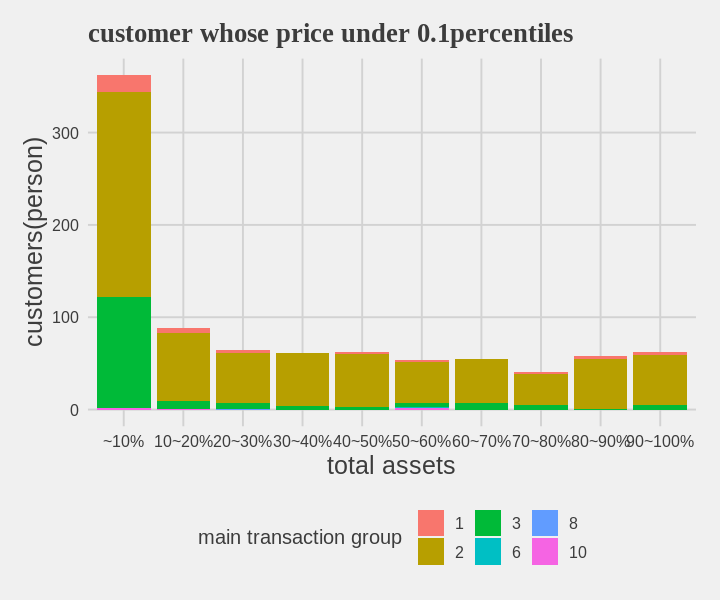

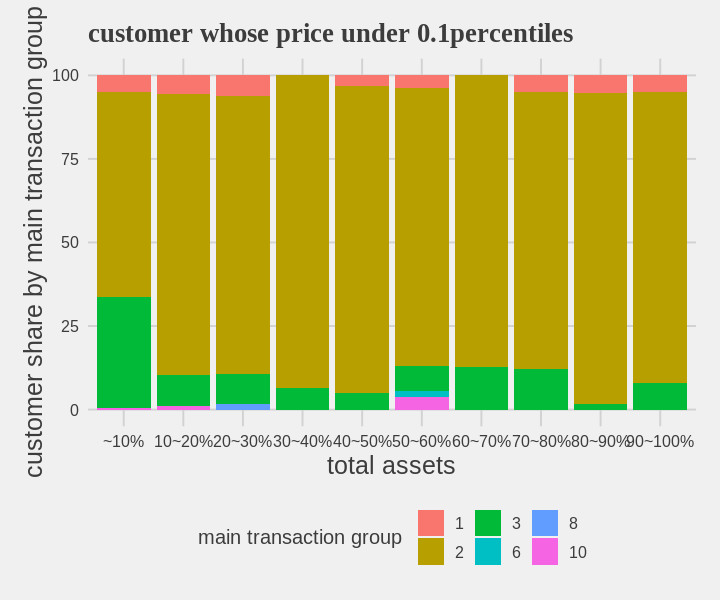

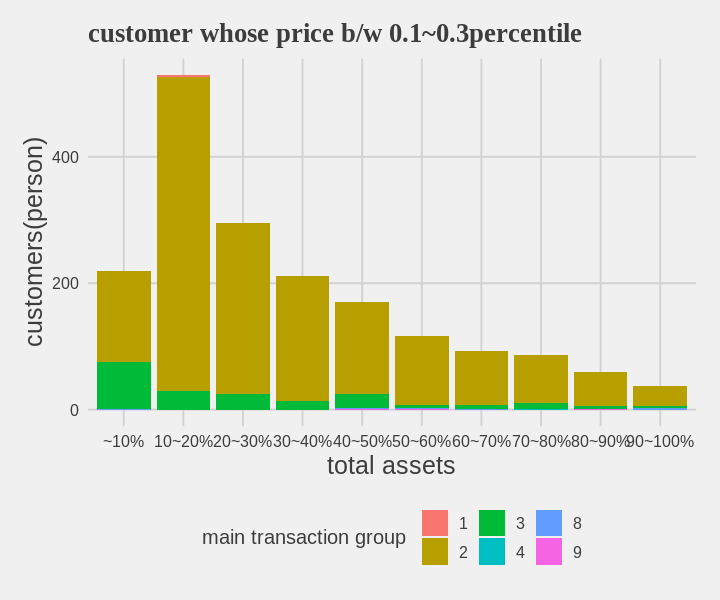

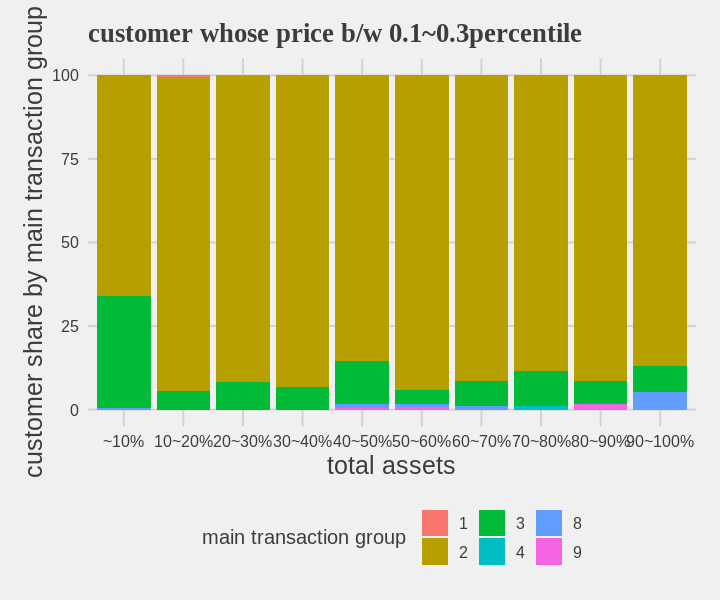

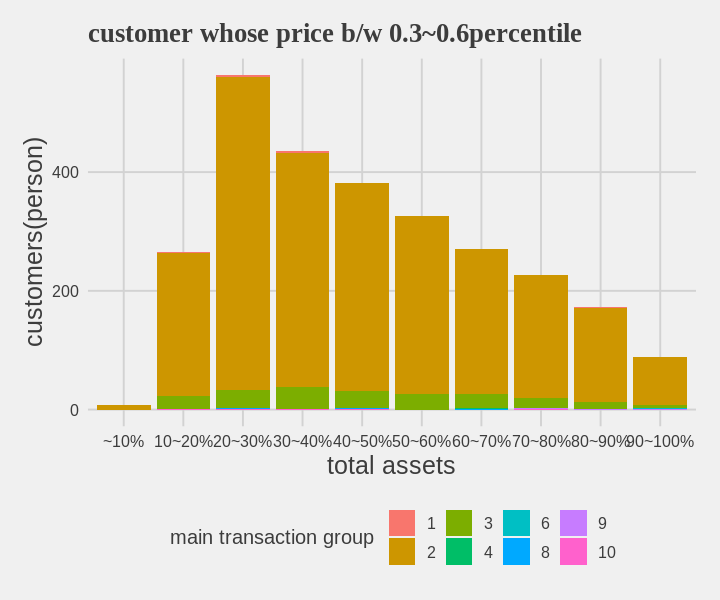

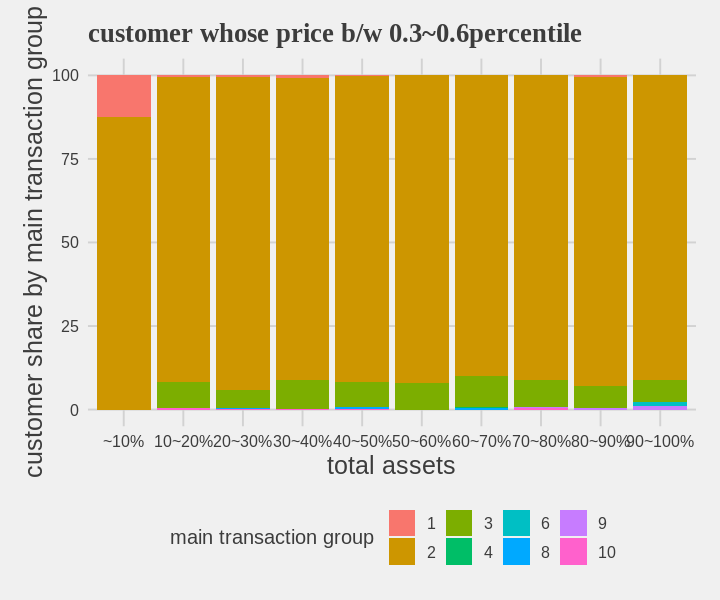

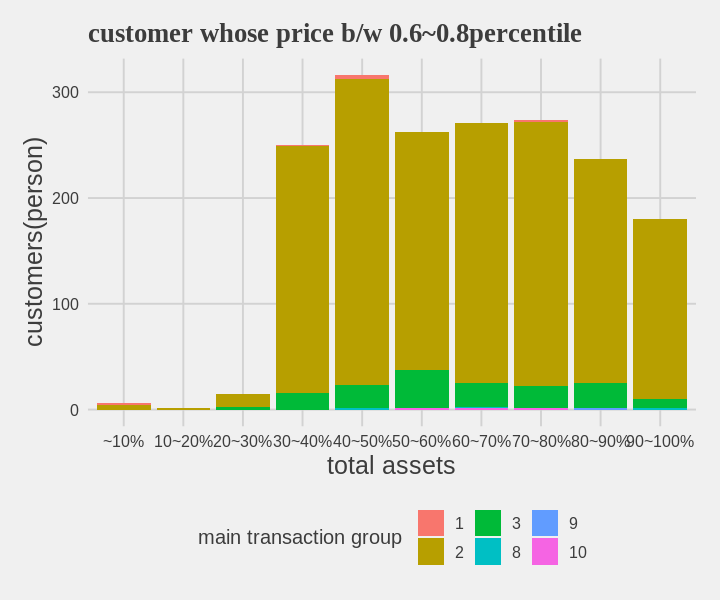

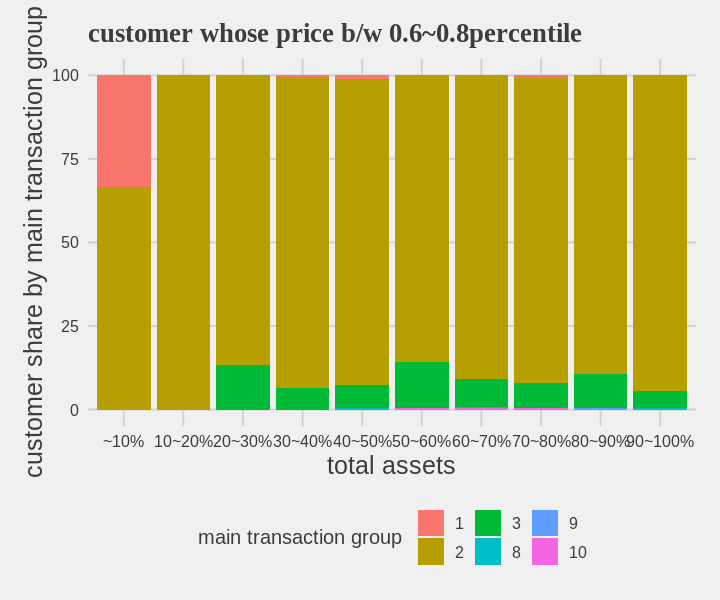

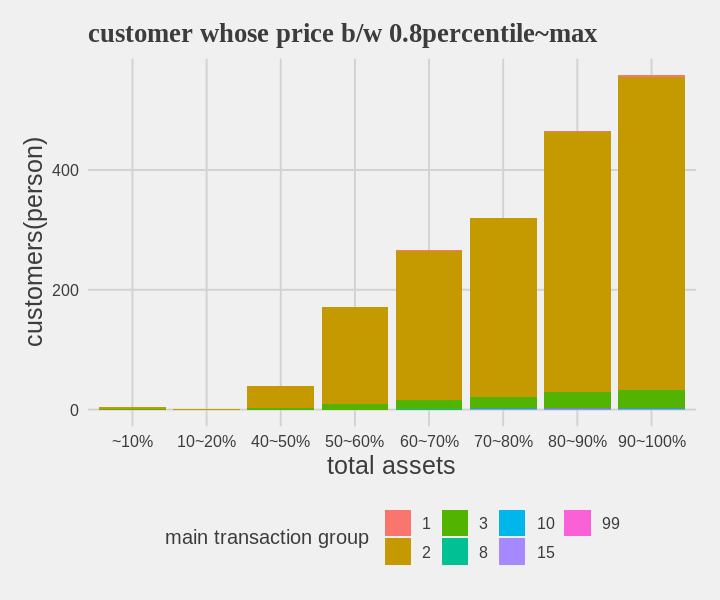

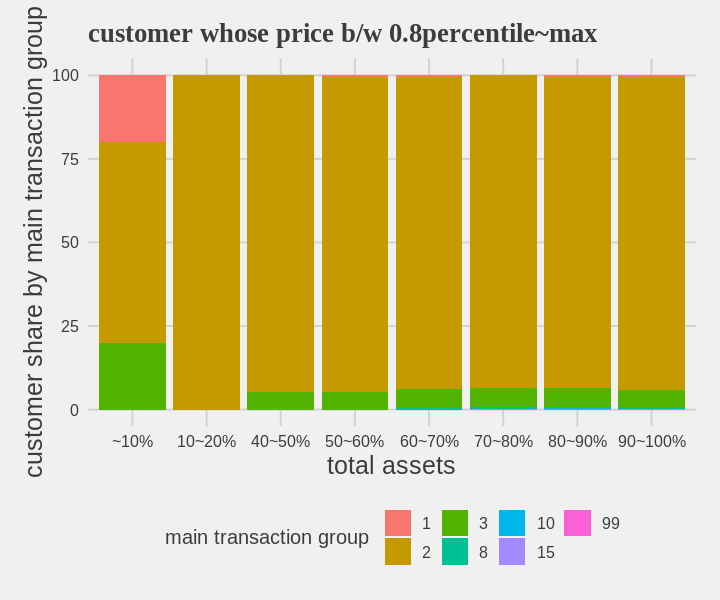

In [ ]:
par(mfrow=c(5,5))
par(mfrow=c(5,5))
#1) theonlyact_Jan_amt_low
ggplot( theonlyact_Jan_amt_low_mrkt, aes(x=totaet_ifo_cat, y = stl_bse_now_eal_amt, fill = mrz_pdt_tp_sgm_cd)) +  geom_bar(stat = "identity") +ggtitle('customer whose price under 0.1percentiles')+xlab('total assets')+ ylab('customers(person)')+scale_fill_discrete(name = "main transaction group")+ theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15))                                
ggplot( theonlyact_Jan_amt_low_mrkt, aes(x=totaet_ifo_cat, y = rate, fill = mrz_pdt_tp_sgm_cd)) +  geom_bar(stat = "identity") +ggtitle('customer whose price under 0.1percentiles')+xlab('total assets')+ ylab('customer share by main transaction group')+scale_fill_discrete(name = "main transaction group")+theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15))                                


#2) theonlyact_Jan_amt_tentothirthy
ggplot( theonlyact_Jan_amt_tentothirthy_mrkt, aes(x=totaet_ifo_cat, y = stl_bse_now_eal_amt, fill = mrz_pdt_tp_sgm_cd)) +  geom_bar(stat = "identity") +ggtitle('customer whose price b/w 0.1~0.3percentile')+xlab('total assets')+ ylab('customers(person)')+scale_fill_discrete(name = "main transaction group")+ theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15))                                
ggplot( theonlyact_Jan_amt_tentothirthy_mrkt, aes(x=totaet_ifo_cat, y = rate, fill = mrz_pdt_tp_sgm_cd)) +  geom_bar(stat = "identity") +ggtitle('customer whose price b/w 0.1~0.3percentile')+xlab('total assets')+ ylab('customer share by main transaction group')+scale_fill_discrete(name = "main transaction group")+theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15))  

#3) theonlyact_Jan_amt_middle
ggplot( theonlyact_Jan_amt_middle_mrkt, aes(x=totaet_ifo_cat, y = stl_bse_now_eal_amt, fill = mrz_pdt_tp_sgm_cd)) +  geom_bar(stat = "identity") +ggtitle('customer whose price b/w 0.3~0.6percentile')+xlab('total assets')+ ylab('customers(person)')+scale_fill_discrete(name = "main transaction group")+ theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15))                                
ggplot( theonlyact_Jan_amt_middle_mrkt, aes(x=totaet_ifo_cat, y = rate, fill = mrz_pdt_tp_sgm_cd)) +  geom_bar(stat = "identity") +ggtitle('customer whose price b/w 0.3~0.6percentile')+xlab('total assets')+ ylab('customer share by main transaction group')+scale_fill_discrete(name = "main transaction group")+theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15))  


#4) theonlyact_Jan_amt_high
ggplot( theonlyact_Jan_amt_high_mrkt, aes(x=totaet_ifo_cat, y = stl_bse_now_eal_amt, fill = mrz_pdt_tp_sgm_cd)) +  geom_bar(stat = "identity") +ggtitle('customer whose price b/w 0.6~0.8percentile')+xlab('total assets')+ ylab('customers(person)')+scale_fill_discrete(name = "main transaction group")+ theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15))                                
ggplot( theonlyact_Jan_amt_high_mrkt, aes(x=totaet_ifo_cat, y = rate, fill = mrz_pdt_tp_sgm_cd)) +  geom_bar(stat = "identity") +ggtitle('customer whose price b/w 0.6~0.8percentile')+xlab('total assets')+ ylab('customer share by main transaction group')+scale_fill_discrete(name = "main transaction group")+theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15)) 


#5) theonlyact_Jan_amt_top
ggplot( theonlyact_Jan_amt_top_mrkt, aes(x=totaet_ifo_cat, y = stl_bse_now_eal_amt, fill = mrz_pdt_tp_sgm_cd)) +  geom_bar(stat = "identity") +ggtitle('customer whose price b/w 0.8percentile~max')+xlab('total assets')+ ylab('customers(person)')+scale_fill_discrete(name = "main transaction group")+ theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15))                                
ggplot( theonlyact_Jan_amt_top_mrkt, aes(x=totaet_ifo_cat, y = rate, fill = mrz_pdt_tp_sgm_cd)) +  geom_bar(stat = "identity") +ggtitle('customer whose price b/w 0.8percentile~max')+xlab('total assets')+ ylab('customer share by main transaction group')+scale_fill_discrete(name = "main transaction group")+theme(plot.title = element_text(size=16,  face="bold",family="serif"),axis.title = element_text(size=15))





*   잔고평가금액을 quantile화하여 서로 잔고평가금액 구간별 그래프 다섯 개
*   하나의 그래프 안에는 고객 수를 y축으로, quantile화된 총자산액수 범위를 x축으로 하는 자산별 고객수 정보를 갖고 있음. 
*   그래프의 색 구분은 주거래상품군. 자산이 많을수록 주식잔고도 많음을 확인할 수 있으며, 모든 자산구간에 걸쳐 국내주식(2번)의 비중이 가장 높은 것을 확인.




In [ ]:
Sys.info()

sysname                               release 
                              "Linux"                           "5.10.133+" 
                              version                              nodename 
"#1 SMP Fri Aug 26 08:44:51 UTC 2022"                        "d718977c9adb" 
                              machine                                 login 
                             "x86_64"                             "unknown" 
                                 user                        effective_user 
                               "root"                                "root"